In [24]:
import matplotlib.pyplot as plt
import numpy as np

nPoints = 100

# Create orthogonal matrices U and V using QR decomposition
U, _ = np.linalg.qr(np.random.randn(nPoints, nPoints))
V, _ = np.linalg.qr(np.random.randn(nPoints, nPoints))

# Create diagonal matrix S1 with singular values from 100 to 1 (logarithmically spaced)
s1_values = np.logspace(2, 0, nPoints)  # log10(100) = 2, log10(1) = 0
S1 = np.diag(s1_values)

# Create diagonal matrix S2 with singular values from 100 to 1e-6 (logarithmically spaced)
s2_values = np.logspace(2, -6, nPoints)  # log10(100) = 2, log10(1e-6) = -6
S2 = np.diag(s2_values)

A1 = U @ S1 @ V.T
A2 = U @ S2 @ V.T

# Display condition numbers
cond1 = np.linalg.cond(A1)
cond2 = np.linalg.cond(A2)
print(f"Condition number A1: {cond1:.2e}")
print(f"Condition number A2: {cond2:.2e}")
print()

# Create random vector b with shape (100, 1)
b = np.random.randn(100, 1)
e = np.random.randn(100, 1) * 1e-6

print("=== Without noise ===")
x = np.linalg.solve(A1, b)
x2 = np.linalg.solve(A2, b)

print("np.linalg.norm(x):", np.linalg.norm(x))
print("np.linalg.norm(x2):", np.linalg.norm(x2))
print("np.linalg.norm(x2-x):", np.linalg.norm(x2-x))    
cosine_similarity = np.dot(x.flatten(), x2.flatten()) / (np.linalg.norm(x) * np.linalg.norm(x2))
print("Cosine similarity:", cosine_similarity)
print()

print("=== With noise ===")
x = np.linalg.solve(A1, b+e)
x2 = np.linalg.solve(A2, b+e)   
print("np.linalg.norm(x):", np.linalg.norm(x))
print("np.linalg.norm(x2):", np.linalg.norm(x2))
print("np.linalg.norm(x2-x):", np.linalg.norm(x2-x))
cosine_similarity = np.dot(x.flatten(), x2.flatten()) / (np.linalg.norm(x) * np.linalg.norm(x2))
print("Cosine similarity:", cosine_similarity)


Condition number A1: 1.00e+02
Condition number A2: 1.00e+08

=== Without noise ===
np.linalg.norm(x): 3.079835744561212
np.linalg.norm(x2): 1755810.1049414251
np.linalg.norm(x2-x): 1755807.5774579225
Cosine similarity: 0.8206555785217116

=== With noise ===
np.linalg.norm(x): 3.0798369819867157
np.linalg.norm(x2): 1755811.4882580913
np.linalg.norm(x2-x): 1755808.960773209
Cosine similarity: 0.8206556967204194


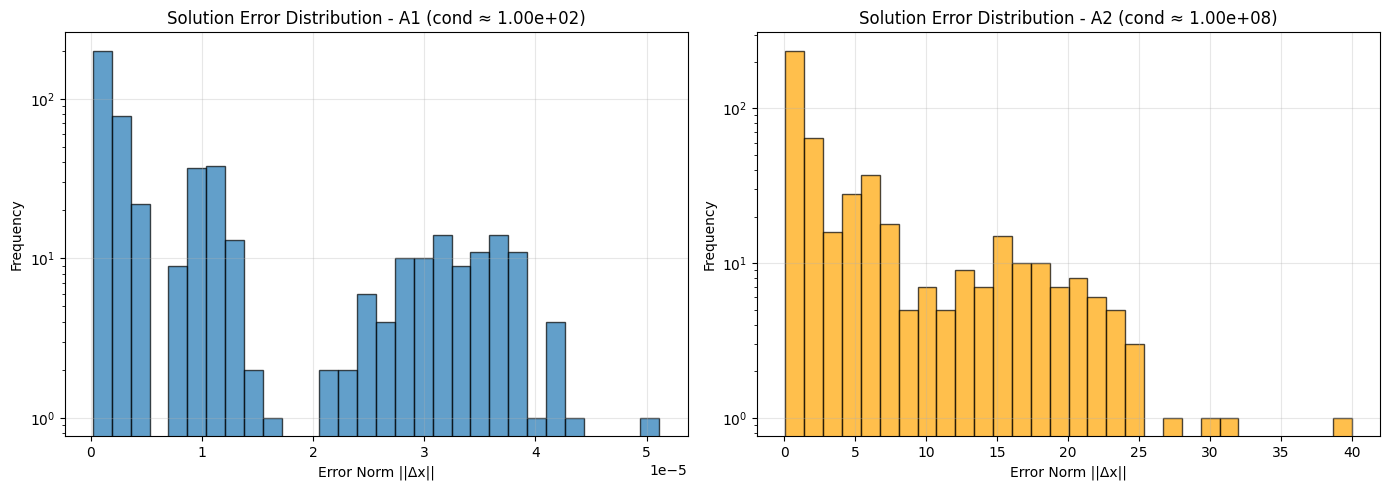

A1 - Mean error: 9.66e-06, Std: 1.24e-05
A2 - Mean error: 5.00e+00, Std: 6.79e+00
Ratio of mean errors (A2/A1): 518169.68x


In [25]:

# Analyze error distribution with different noise levels
num_samples = 100
noise_scales = np.logspace(-7, -5, 5)  # Range from 1e-7 to 1e-5
error_norms_A1 = []
error_norms_A2 = []

for noise_scale in noise_scales:
    for _ in range(num_samples):
        e_test = np.random.randn(100, 1) * noise_scale
        
        # Solve with error for both matrices
        x1_clean = np.linalg.solve(A1, b)
        x1_noisy = np.linalg.solve(A1, b + e_test)
        
        x2_clean = np.linalg.solve(A2, b)
        x2_noisy = np.linalg.solve(A2, b + e_test)
        
        # Store the error norms (difference in solutions)
        error_norms_A1.append(np.linalg.norm(x1_noisy - x1_clean))
        error_norms_A2.append(np.linalg.norm(x2_noisy - x2_clean))

# Create histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(error_norms_A1, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Error Norm ||Δx||')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Solution Error Distribution - A1 (cond ≈ {cond1:.2e})')
axes[0].set_yscale('log')
axes[0].grid(alpha=0.3)

axes[1].hist(error_norms_A2, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Error Norm ||Δx||')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Solution Error Distribution - A2 (cond ≈ {cond2:.2e})')
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"A1 - Mean error: {np.mean(error_norms_A1):.2e}, Std: {np.std(error_norms_A1):.2e}")
print(f"A2 - Mean error: {np.mean(error_norms_A2):.2e}, Std: {np.std(error_norms_A2):.2e}")
print(f"Ratio of mean errors (A2/A1): {np.mean(error_norms_A2) / np.mean(error_norms_A1):.2f}x")


Condition number A1_lin: 1.00e+02
Condition number A2_log: 1.00e+02

=== Without noise (linear/log) ===
np.linalg.norm(x1): 1.3751787002682592
np.linalg.norm(x2): 3.079835744561212
np.linalg.norm(x2-x1): 2.2677100530405543
Cosine similarity: 0.7359525536444153

=== With noise (linear/log) ===
np.linalg.norm(x1): 1.375178740398421
np.linalg.norm(x2): 3.079835945192628
np.linalg.norm(x2-x1): 2.2677102771221573
Cosine similarity: 0.7359525231707202


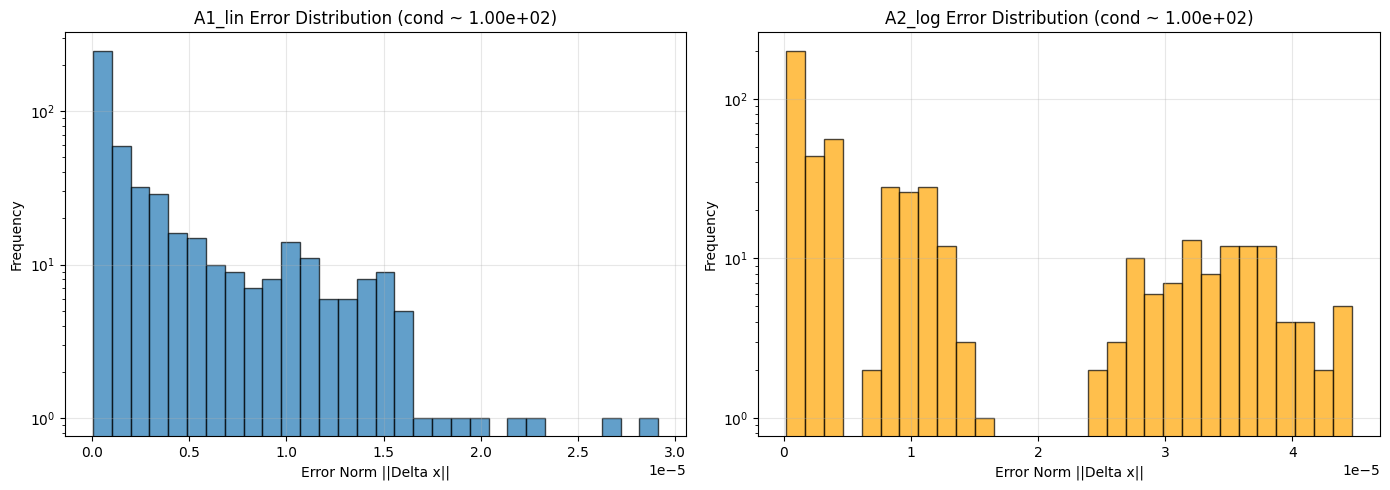

A1_lin - Mean error: 3.34e-06, Std: 4.77e-06
A2_log - Mean error: 9.81e-06, Std: 1.29e-05
Ratio of mean errors (A2_log/A1_lin): 2.94x


In [26]:
# Repeat experiment with S1 linear and S2 logarithmic spacing
s1_lin_values = np.linspace(100, 1, nPoints)
s2_log_values = np.logspace(2, 0, nPoints) 
S1_lin = np.diag(s1_lin_values)
S2_log = np.diag(s2_log_values)

A1_lin = U @ S1_lin @ V.T
A2_log = U @ S2_log @ V.T

cond1_lin = np.linalg.cond(A1_lin)
cond2_log = np.linalg.cond(A2_log)
print(f"Condition number A1_lin: {cond1_lin:.2e}")
print(f"Condition number A2_log: {cond2_log:.2e}")
print()

e_lin = np.random.randn(100, 1) * 1e-6

print("=== Without noise (linear/log) ===")
x1 = np.linalg.solve(A1_lin, b)
x2 = np.linalg.solve(A2_log, b)
print("np.linalg.norm(x1):", np.linalg.norm(x1))
print("np.linalg.norm(x2):", np.linalg.norm(x2))
print("np.linalg.norm(x2-x1):", np.linalg.norm(x2 - x1))
cosine_similarity = np.dot(x1.flatten(), x2.flatten()) / (np.linalg.norm(x1) * np.linalg.norm(x2))
print("Cosine similarity:", cosine_similarity)
print()

print("=== With noise (linear/log) ===")
x1 = np.linalg.solve(A1_lin, b + e_lin)
x2 = np.linalg.solve(A2_log, b + e_lin)
print("np.linalg.norm(x1):", np.linalg.norm(x1))
print("np.linalg.norm(x2):", np.linalg.norm(x2))
print("np.linalg.norm(x2-x1):", np.linalg.norm(x2 - x1))
cosine_similarity = np.dot(x1.flatten(), x2.flatten()) / (np.linalg.norm(x1) * np.linalg.norm(x2))
print("Cosine similarity:", cosine_similarity)

# Histogram for error distribution
num_samples_linlog = 100
noise_scales_linlog = np.logspace(-7, -5, 5)
error_norms_A1_lin = []
error_norms_A2_log = []

for noise_scale in noise_scales_linlog:
    for _ in range(num_samples_linlog):
        e_test = np.random.randn(100, 1) * noise_scale
        x1_clean = np.linalg.solve(A1_lin, b)
        x1_noisy = np.linalg.solve(A1_lin, b + e_test)
        x2_clean = np.linalg.solve(A2_log, b)
        x2_noisy = np.linalg.solve(A2_log, b + e_test)
        error_norms_A1_lin.append(np.linalg.norm(x1_noisy - x1_clean))
        error_norms_A2_log.append(np.linalg.norm(x2_noisy - x2_clean))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(error_norms_A1_lin, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Error Norm ||Delta x||')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'A1_lin Error Distribution (cond ~ {cond1_lin:.2e})')
axes[0].set_yscale('log')
axes[0].grid(alpha=0.3)

axes[1].hist(error_norms_A2_log, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Error Norm ||Delta x||')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'A2_log Error Distribution (cond ~ {cond2_log:.2e})')
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"A1_lin - Mean error: {np.mean(error_norms_A1_lin):.2e}, Std: {np.std(error_norms_A1_lin):.2e}")
print(f"A2_log - Mean error: {np.mean(error_norms_A2_log):.2e}, Std: {np.std(error_norms_A2_log):.2e}")
print(f"Ratio of mean errors (A2_log/A1_lin): {np.mean(error_norms_A2_log) / np.mean(error_norms_A1_lin):.2f}x")


A1_lin.shape: (100, 10)
A2_log.shape: (100, 10)
=== Without noise (linear/log) ===
np.linalg.norm(x1): 0.0360388066705492
np.linalg.norm(x2): 0.08513217388365014
np.linalg.norm(x2-x1): 0.0626461746584661
Cosine similarity: 0.7532017741624973

=== With noise (linear/log) ===
np.linalg.norm(x1): 0.03603879632988865
np.linalg.norm(x2): 0.08513214452734484
np.linalg.norm(x2-x1): 0.06264615229207128
Cosine similarity: 0.7532017706621533


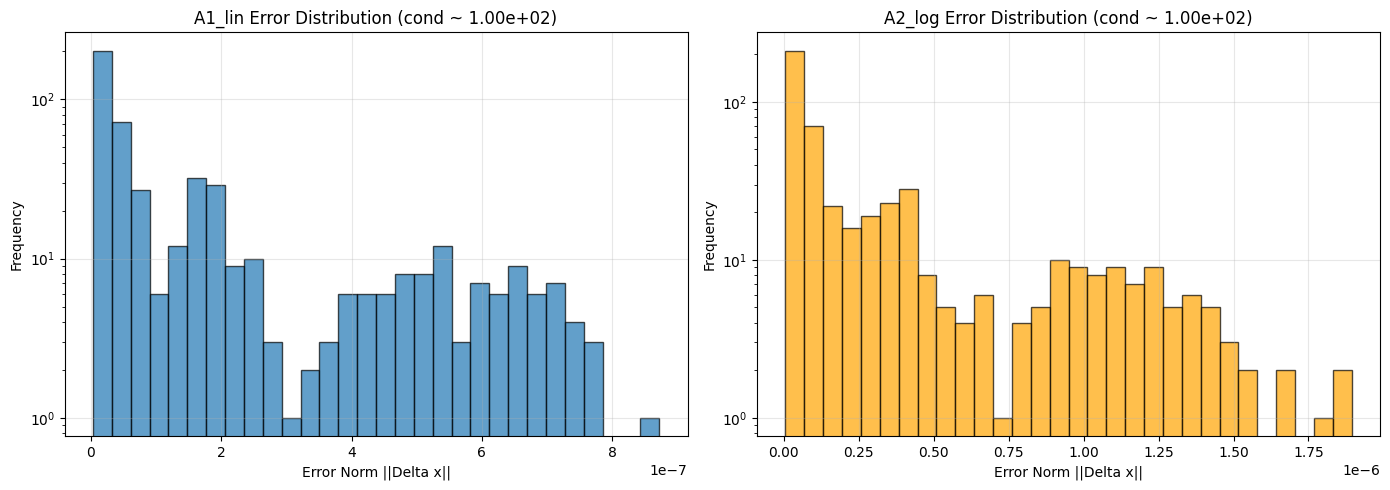

A1_lin - Mean error: 1.61e-07, Std: 2.13e-07
A2_log - Mean error: 3.19e-07, Std: 4.29e-07
Ratio of mean errors (A2_log/A1_lin): 1.98x


In [27]:
A1_lin = U @ S1_lin @ V.T
A2_log = U @ S2_log @ V.T


A1_lin = A1_lin[:,:10]
A2_log = A2_log[:,:10]

print( "A1_lin.shape:", A1_lin.shape)
print( "A2_log.shape:", A2_log.shape)


e_lin = np.random.randn(100, 1) * 1e-6

print("=== Without noise (linear/log) ===")
x1 = np.linalg.lstsq(A1_lin, b, rcond=None)[0]
x2 = np.linalg.lstsq(A2_log, b, rcond=None)[0]
print("np.linalg.norm(x1):", np.linalg.norm(x1))
print("np.linalg.norm(x2):", np.linalg.norm(x2))
print("np.linalg.norm(x2-x1):", np.linalg.norm(x2 - x1))
cosine_similarity = np.dot(x1.flatten(), x2.flatten()) / (np.linalg.norm(x1) * np.linalg.norm(x2))
print("Cosine similarity:", cosine_similarity)
print()

print("=== With noise (linear/log) ===")
x1 = np.linalg.lstsq(A1_lin, b + e_lin, rcond=None)[0]
x2 = np.linalg.lstsq(A2_log, b + e_lin, rcond=None)[0]
print("np.linalg.norm(x1):", np.linalg.norm(x1))
print("np.linalg.norm(x2):", np.linalg.norm(x2))
print("np.linalg.norm(x2-x1):", np.linalg.norm(x2 - x1))
cosine_similarity = np.dot(x1.flatten(), x2.flatten()) / (np.linalg.norm(x1) * np.linalg.norm(x2))
print("Cosine similarity:", cosine_similarity)

# Histogram for error distribution
num_samples_linlog = 100
noise_scales_linlog = np.logspace(-7, -5, 5)
error_norms_A1_lin = []
error_norms_A2_log = []

for noise_scale in noise_scales_linlog:
    for _ in range(num_samples_linlog):
        e_test = np.random.randn(100, 1) * noise_scale
        x1_clean = np.linalg.lstsq(A1_lin, b, rcond=None)[0]
        x1_noisy = np.linalg.lstsq(A1_lin, b + e_test, rcond=None)[0]
        x2_clean = np.linalg.lstsq(A2_log, b, rcond=None)[0]
        x2_noisy = np.linalg.lstsq(A2_log, b + e_test, rcond=None)[0]
        error_norms_A1_lin.append(np.linalg.norm(x1_noisy - x1_clean))
        error_norms_A2_log.append(np.linalg.norm(x2_noisy - x2_clean))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(error_norms_A1_lin, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Error Norm ||Delta x||')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'A1_lin Error Distribution (cond ~ {cond1_lin:.2e})')
axes[0].set_yscale('log')
axes[0].grid(alpha=0.3)

axes[1].hist(error_norms_A2_log, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Error Norm ||Delta x||')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'A2_log Error Distribution (cond ~ {cond2_log:.2e})')
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"A1_lin - Mean error: {np.mean(error_norms_A1_lin):.2e}, Std: {np.std(error_norms_A1_lin):.2e}")
print(f"A2_log - Mean error: {np.mean(error_norms_A2_log):.2e}, Std: {np.std(error_norms_A2_log):.2e}")
print(f"Ratio of mean errors (A2_log/A1_lin): {np.mean(error_norms_A2_log) / np.mean(error_norms_A1_lin):.2f}x")
